## <center><b>LATIHAN TIME-SERIES ARIMA</b></center>

### Target:
1. Prediksi lah harga tertinggi dan terendah di tahun 2021.
2. Visualisasikan volume dari tahun ke tahun.

### Information:
1. <b> The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.</b>

- Kolom Open dan Close menunjukkan harga awal dan akhir di mana saham diperdagangkan pada hari tertentu.

2. <b> High and Low represent the maximum and minimum price of the share for the day. </b>

- High dan Low mewakili harga maksimum dan minimum saham untuk hari itu

3. <b> Volume is the number of shares bought or sold in the day </b>

- Volume menunjukkan jumlah saham yang diperdagangkan atau dijual pada hari itu.

Data Preparation

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('../../../../dataset/datastock/Microsoft_Stock.csv')
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [64]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [65]:
df.duplicated().sum()

0

In [66]:
for a in df.columns:
    unique = df[a].unique()
    print(f'{a}: {unique}')

Date: ['4/1/2015 16:00:00' '4/2/2015 16:00:00' '4/6/2015 16:00:00' ...
 '3/29/2021 16:00:00' '3/30/2021 16:00:00' '3/31/2021 16:00:00']
Open: [ 40.6   40.66  40.34 ... 236.59 233.53 232.91]
High: [ 40.76  40.74  41.78 ... 236.8  233.85 239.1 ]
Low: [ 40.31  40.12  40.18 ... 231.88 231.1  232.39]
Close: [ 40.72  40.29  41.55 ... 235.24 231.85 235.77]
Volume: [36865322 37487476 39223692 ... 25227455 24792012 43623471]


In [67]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [68]:
df.nunique()

Date      1511
Open      1409
High      1400
Low       1397
Close     1398
Volume    1511
dtype: int64

EDA

In [69]:
df['Date'] = pd.to_datetime(df['Date'])
# df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


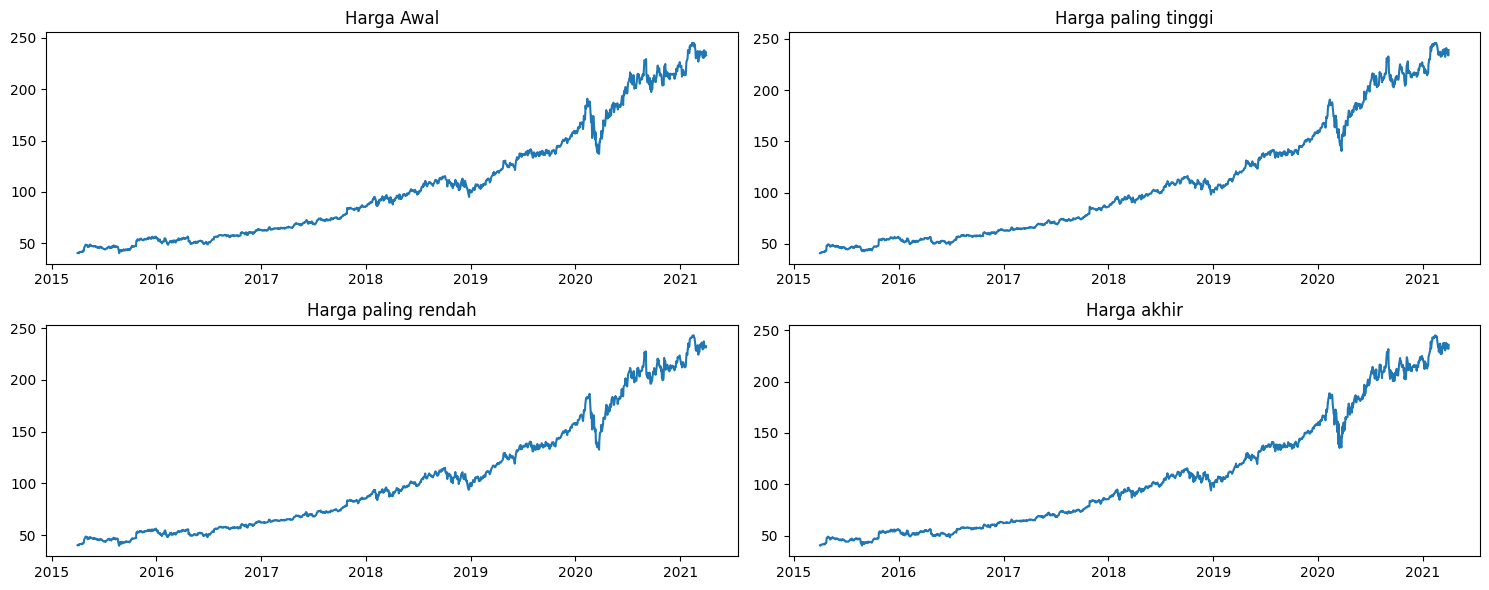

In [71]:
fig, axs = plt.subplots(2, 2, figsize=(15, 6))

axs[0, 0].plot(df['Date'], df['Open'])
axs[0, 0].set_title('Harga Awal')

axs[0, 1].plot(df['Date'], df['High'])
axs[0, 1].set_title('Harga paling tinggi')

axs[1, 0].plot(df['Date'], df['Low'])
axs[1, 0].set_title('Harga paling rendah')

axs[1, 1].plot(df['Date'], df['Close'])
axs[1, 1].set_title('Harga akhir')

plt.tight_layout()
plt.show()

C:\Users\AVEL\AppData\Local\Temp\ipykernel_4232\2967624008.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


<AxesSubplot: >

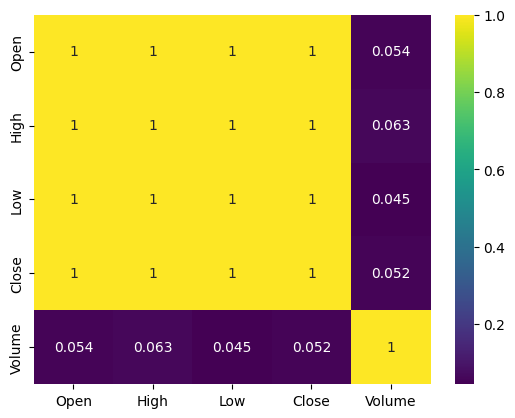

In [72]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

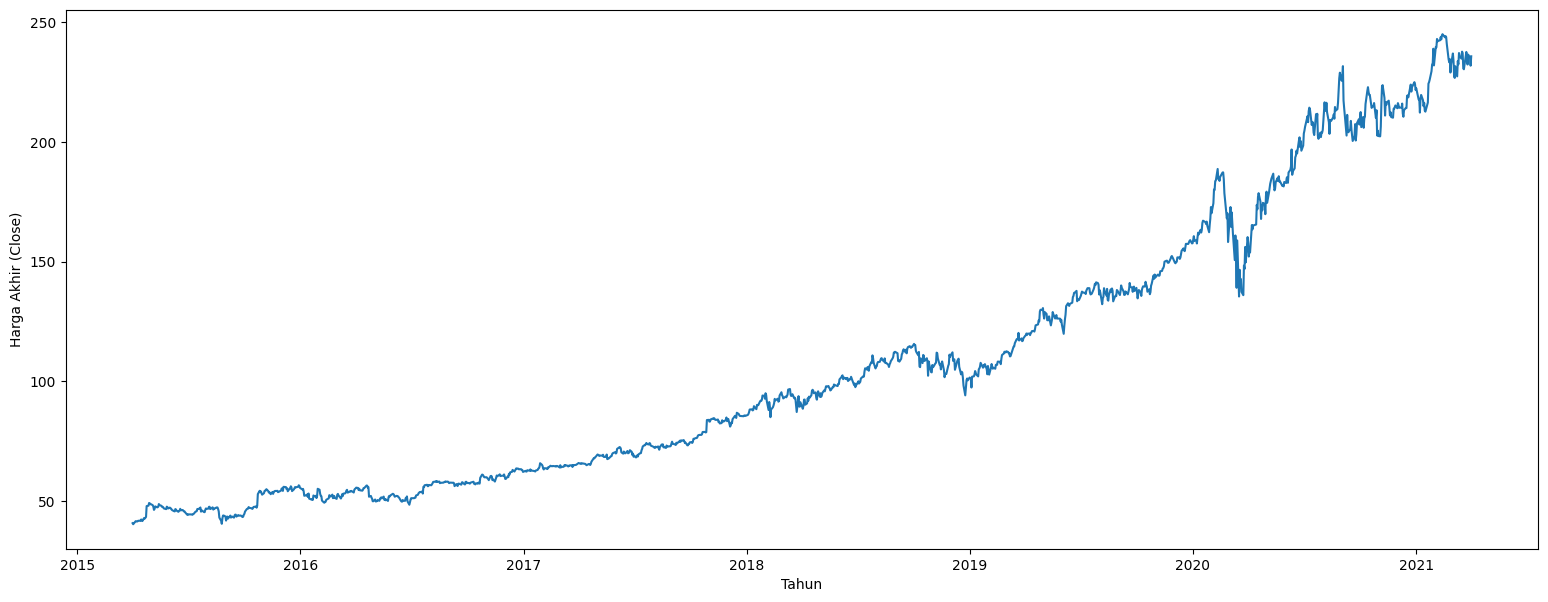

In [73]:
plt.figure(figsize=(19, 7))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Tahun')
plt.ylabel('Harga Akhir (Close)')
plt.show()

<AxesSubplot: >

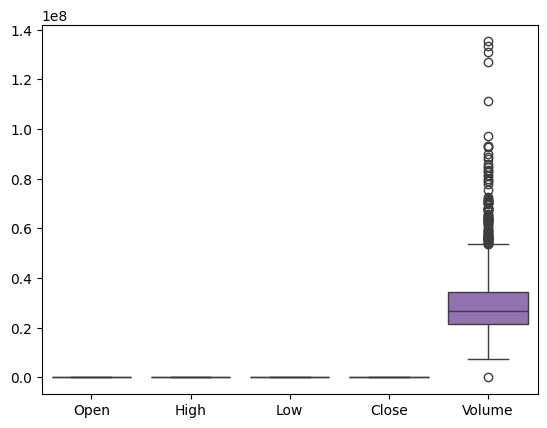

In [74]:
sns.boxplot(df)

In [75]:
df.loc[[df['Close'].idxmax()]]

,Date,Open,High,Low,Close,Volume
1478,2021-02-12 16:00:00,243.93,245.3,242.73,244.99,16561079


In [76]:
df.loc[[df['Close'].idxmin()]]

,Date,Open,High,Low,Close,Volume
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476


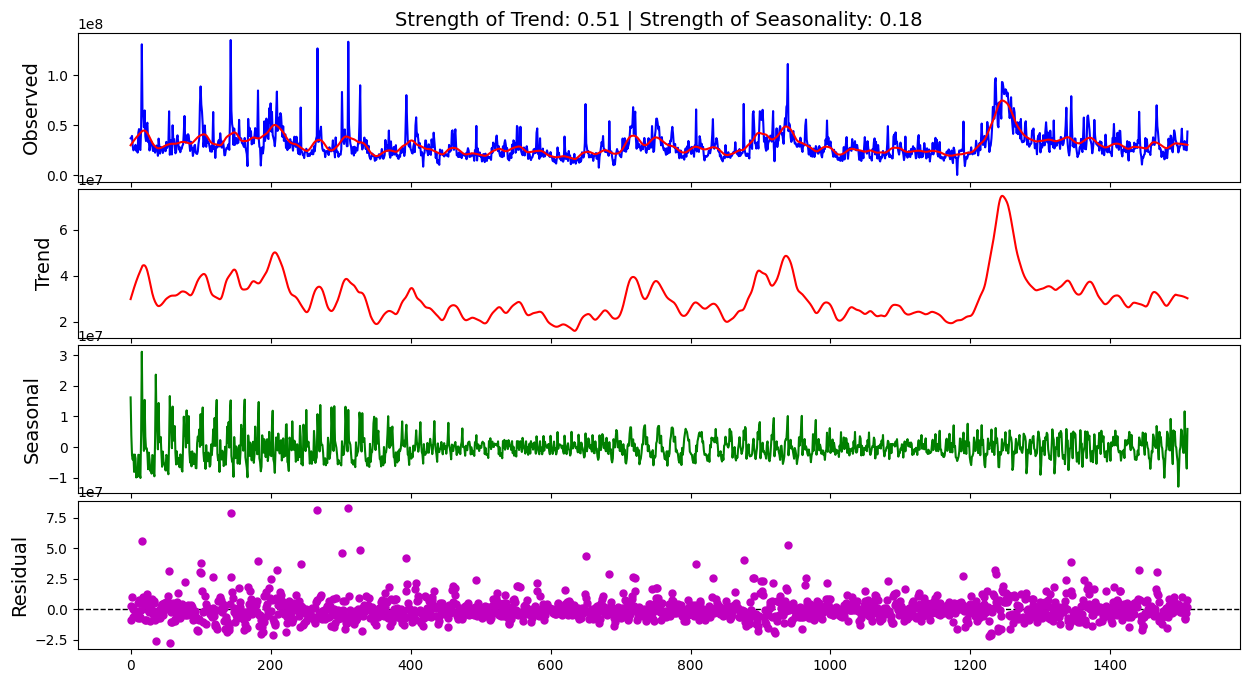

In [77]:
from jcopml.time_series.decomposition import stl_decomposition
series = df.Volume
components = stl_decomposition(series, plot=True, period=20)

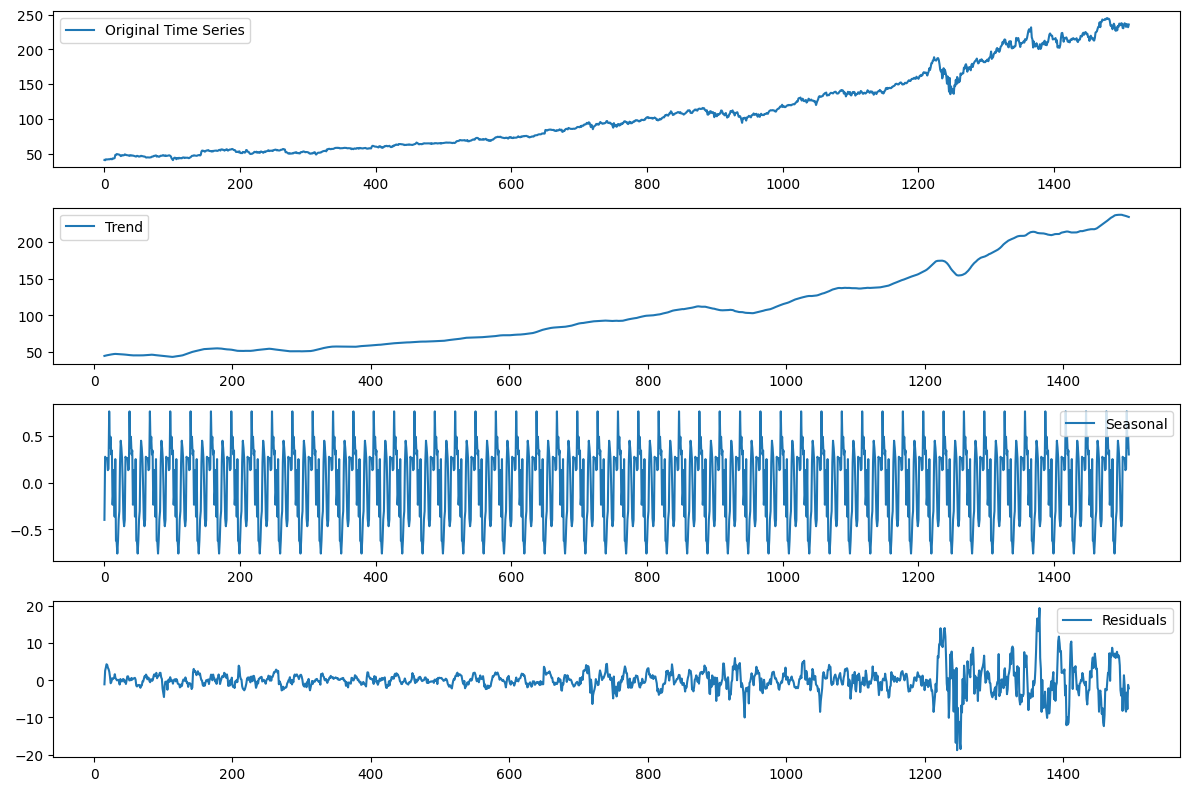

In [78]:
# Mengimport library decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Melakukan seasonal decomposition
result = seasonal_decompose(df['Close'], model='additive', period=30)

# Menampilkan hasil decomposition
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['Close'], label='Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

In [79]:
df_2021 = df[df['Date'].dt.year == 2021]
print(df_2021)

                    Date    Open    High     Low   Close    Volume
1450 2021-01-04 16:00:00  222.53  223.00  214.81  217.69  37130139
1451 2021-01-05 16:00:00  217.26  218.52  215.70  217.90  23822953
1452 2021-01-06 16:00:00  212.17  216.49  211.94  212.25  35930653
1453 2021-01-07 16:00:00  214.04  219.34  213.71  218.29  27694480
1454 2021-01-08 16:00:00  218.68  220.58  217.03  219.62  22956206
...                  ...     ...     ...     ...     ...       ...
1506 2021-03-25 16:00:00  235.30  236.94  231.57  232.34  34061853
1507 2021-03-26 16:00:00  231.55  236.71  231.55  236.48  25479853
1508 2021-03-29 16:00:00  236.59  236.80  231.88  235.24  25227455
1509 2021-03-30 16:00:00  233.53  233.85  231.10  231.85  24792012
1510 2021-03-31 16:00:00  232.91  239.10  232.39  235.77  43623471

[61 rows x 6 columns]


In [80]:
df['Bulan'] = df['Date'].dt.strftime('%B')

In [81]:
# from statsmodels.tsa.stattools import adfuller

# # Contoh menggunakan pandas DataFrame
# result = adfuller(df['Close'])
# print('ADF Statistic:', result[0])
# print('P-value:', result[1])
# print('Critical Values:', result[4])

# print('\n')
# print('Jika p-value dari ADF Test cukup rendah \n dan ADF Statistic lebih kecil dari critical values \n maka data tersebut adalah Stationary')

In [82]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 1.7371362899270983
p-value: 0.9982158366942122


Uji ADF (Augmented Dickey-Fuller) memiliki dua hipotesis yang diuji:

1. <b>Hipotesis Nol (H0)</b>: Hipotesis nol ADF adalah bahwa data tidak stasioner (non-stationary). Jika nilai p lebih besar dari tingkat signifikansi yang ditentukan (misalnya, 0.05), kita gagal menolak hipotesis nol.

2. <b>Hipotesis Alternatif (H1)</b>: Hipotesis alternatif ADF adalah bahwa data stasioner. Jika nilai p lebih kecil dari tingkat signifikansi yang ditentukan, kita dapat menolak hipotesis nol dan menyimpulkan bahwa data stasioner.

Namun, jika nilai p lebih besar dari <u>tingkat signifikansi</u> yang ditentukan <b>(0.05)</b>, dan nilai statistik ADF (ADF Statistic) cukup besar, maka kita tidak dapat menolak hipotesis nol. Dalam konteks ini, nilai ADF Statistic yang besar menunjukkan bahwa kita tidak dapat menolak hipotesis nol, yaitu bahwa data mungkin non-stasioner.

In [83]:
from statsmodels.tsa.stattools import kpss

result_kpss = kpss(df['Close'], regression='c')
print('KPSS Statistic:', result_kpss[0])
print('p-value:', result_kpss[1])

print('\n')
print('Jika nilai p lebih besar dari tingkat signifikansi, Anda dapat menganggap data tersebut stasioner.')
print('Karena p-value nya LEBIH KECIL dari tingkat signifikansinya, maka data tersebut bisa dibilang non-stasioner')

KPSS Statistic: 5.410649234963597
p-value: 0.01


Jika nilai p lebih besar dari tingkat signifikansi, Anda dapat menganggap data tersebut stasioner.
Karena p-value nya LEBIH KECIL dari tingkat signifikansinya, maka data tersebut bisa dibilang non-stasioner


C:\Users\AVEL\AppData\Local\Temp\ipykernel_4232\78489591.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(df['Close'], regression='c')


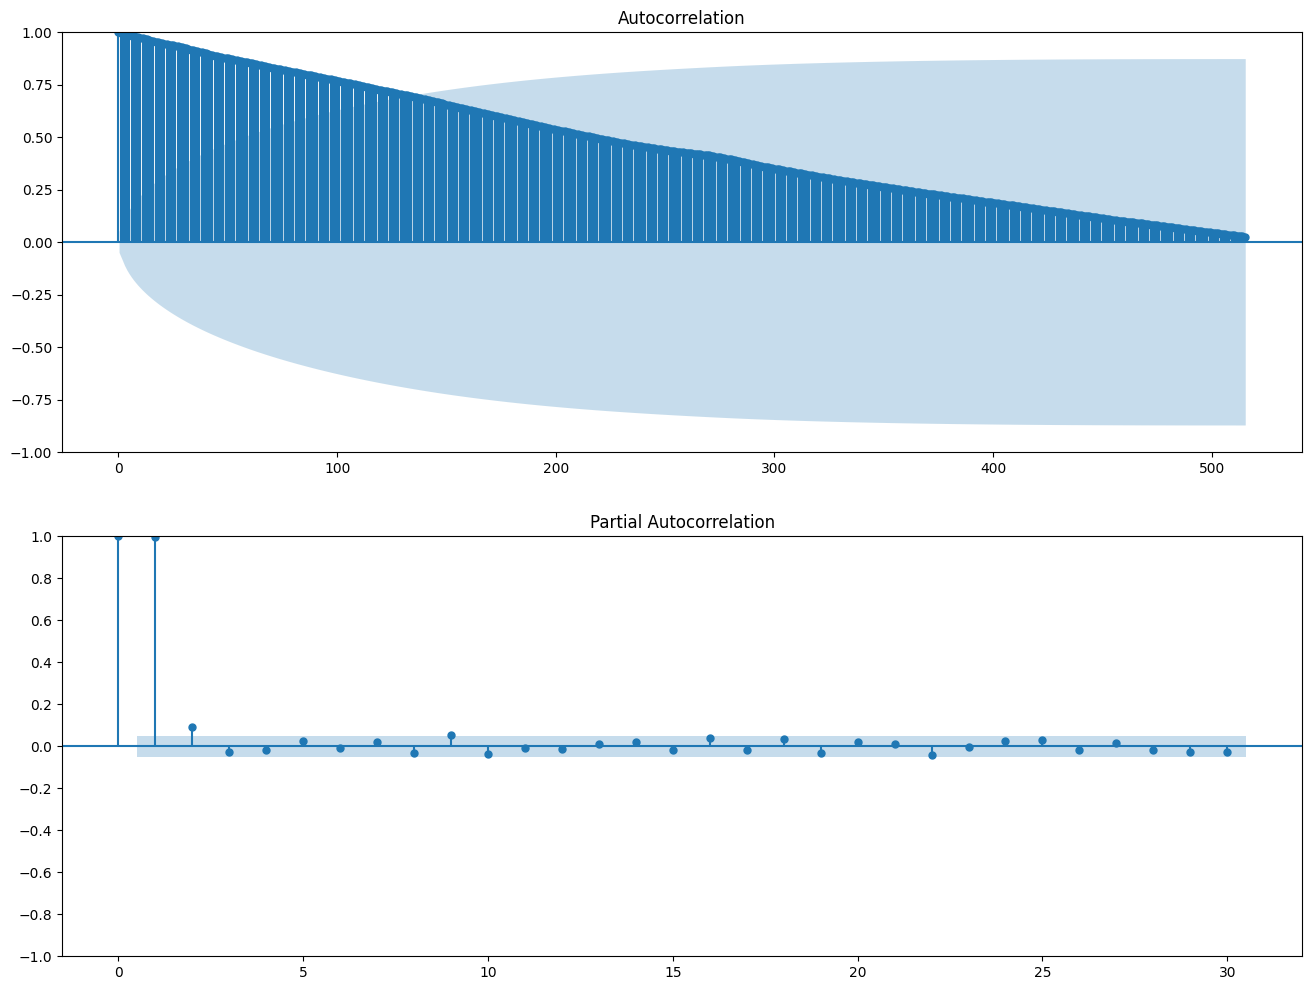

In [84]:
import statsmodels.api as sm

# Contoh menggunakan pandas DataFrame
time_series_data = pd.Series(df['Close'].values, index=df['Date'])

# Melihat plot ACF dan PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

sm.graphics.tsa.plot_acf(time_series_data, lags=515, ax=ax1)
sm.graphics.tsa.plot_pacf(time_series_data, lags=30, ax=ax2)

step = 0.2
plt.yticks(np.arange(-1, 1 + step, step))

plt.show()

In [85]:
diff_A = df['Close'].diff().dropna()

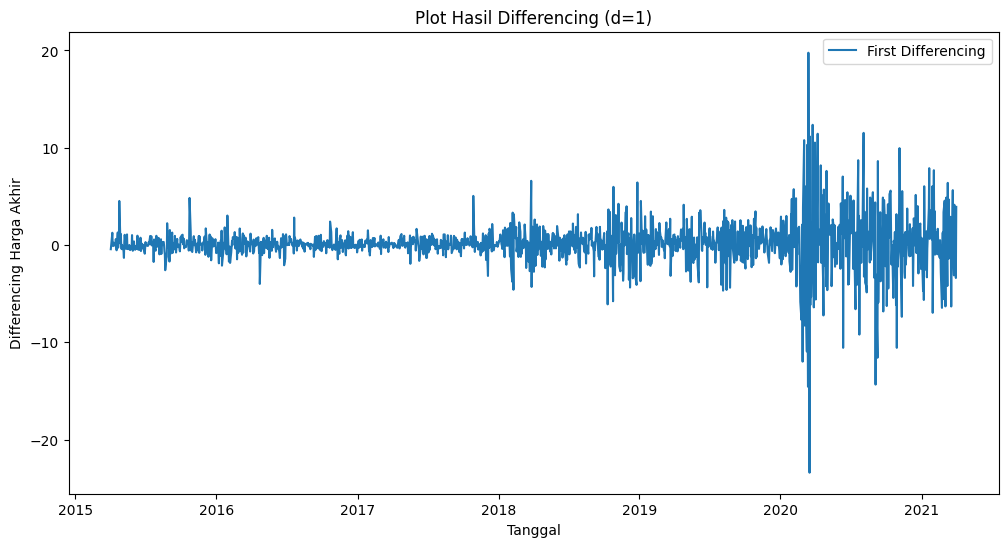

In [86]:
# Contoh menggunakan pandas DataFrame
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][1:], diff_A, label='First Differencing')
plt.title('Plot Hasil Differencing (d=1)')
plt.xlabel('Tanggal')
plt.ylabel('Differencing Harga Akhir')
plt.legend()
plt.show()

In [87]:
x = df.drop(['Date', 'Bulan', 'Close'], axis=1)
y = df['Close']

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Membagi data menjadi data latih dan uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()
model.fit(x_train, y_train)

# Membuat prediksi untuk data uji
L_pred = model.predict(x_test)

In [89]:
from statsmodels.tsa.arima.model import ARIMA
# Menggunakan Close sebagai variabel target
target = df_2021['Close']

# Membuat model ARIMA
# Menentukan variabel p, d, q
# p = partial correlation (AR)
# d = differencing (I)
# q = auto correlation (MA)
model = ARIMA(target, order=(1, 1, 1))  # Pilih parameter order sesuai dengan analisis data dan pengujian model
fit_model = model.fit()

# Melakukan prediksi
forecast = fit_model.get_forecast(steps=len(df_2021))
forecast_index = pd.date_range(start=df_2021['Date'].min(), periods=len(df_2021), freq='B')

# Menampilkan hasil prediksi
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean.values}, index=forecast_index)
print(forecast_df)

                       Forecast
2021-01-04 16:00:00  235.150846
2021-01-05 16:00:00  235.125281
2021-01-06 16:00:00  235.124225
2021-01-07 16:00:00  235.124181
2021-01-08 16:00:00  235.124180
...                         ...
2021-03-23 16:00:00  235.124180
2021-03-24 16:00:00  235.124180
2021-03-25 16:00:00  235.124180
2021-03-26 16:00:00  235.124180
2021-03-29 16:00:00  235.124180

[61 rows x 1 columns]


c:\Users\AVEL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\AVEL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\AVEL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\AVEL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\AVEL\AppData\Local\Prog

In [90]:
print(f'Prediksi Harga Tertinggi: {max(L_pred)}')
print(f'Prediksi Harga Terendah: {min(L_pred)}')

Prediksi Harga Tertinggi: 244.27977369966254
Prediksi Harga Terendah: 41.20771767786728


In [91]:
from forex_python.converter import CurrencyRates

# Gantilah nilai-nilai ini sesuai dengan kebutuhan Anda
exchange_rate_to_rupiah = 14000  # Nilai tukar ke rupiah

# Prediksi harga tertinggi dan terendah dari tahun 2021
prediksi_harga_tertinggi = int(max(L_pred))
prediksi_harga_terendah = int(min(L_pred))

# Konversi ke rupiah
harga_tertinggi_rupiah = prediksi_harga_tertinggi * exchange_rate_to_rupiah
harga_terendah_rupiah = prediksi_harga_terendah * exchange_rate_to_rupiah

print(f'Prediksi Harga Tertinggi (IDR): {harga_tertinggi_rupiah}')
print(f'Prediksi Harga Terendah (IDR): {harga_terendah_rupiah}')

Prediksi Harga Tertinggi (IDR): 3416000
Prediksi Harga Terendah (IDR): 574000


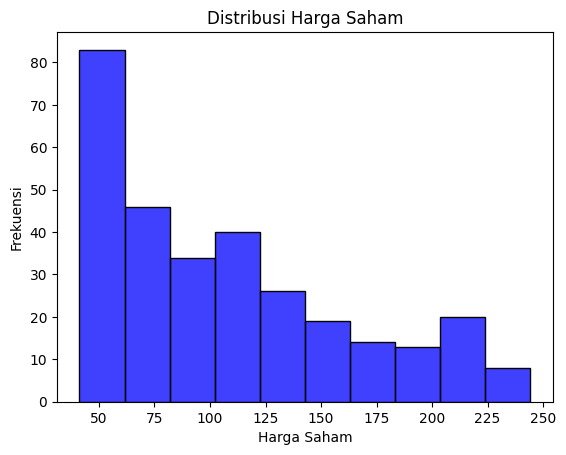

In [92]:
# Membuat histogram dengan seaborn
sns.histplot(L_pred, bins=10, color='blue', kde=False)

# Menambahkan label dan judul
plt.xlabel('Harga Saham')
plt.ylabel('Frekuensi')
plt.title('Distribusi Harga Saham')

# Menampilkan histogram
plt.show()

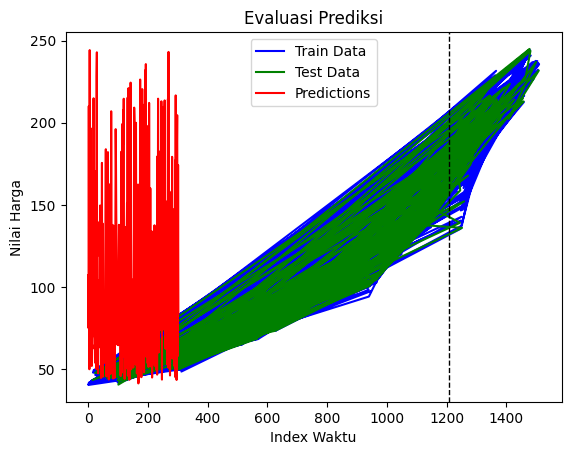

In [94]:
# Plot data train
plt.plot(y_train, label='Train Data', color='blue')

# Plot data test
plt.plot(y_test, label='Test Data', color='green')

# Plot hasil prediksi
plt.plot(, label='Predictions', color='red')

# Menandai batas antara data train dan data test
plt.axvline(x=len(y_train), color='black', linestyle='--', linewidth=1)

# Menambahkan label dan legenda
plt.xlabel('Index Waktu')
plt.ylabel('Nilai Harga')
plt.title('Evaluasi Prediksi')
plt.legend()

# Menampilkan plot
plt.show()